# Chapter 1

## Defining the tensor data type

### 1. Define a tensor with a default data type:

In [2]:
import torch

In [3]:
x = torch.ones(2, 2)
print(x)
print(x.dtype)

tensor([[1., 1.],
        [1., 1.]])
torch.float32


### 2. Specify the data type when defining a tensor:

In [4]:
x = torch.ones(2, 2, dtype=torch.int8)
print(x)
print(x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)
torch.int8


## Changing the tensor's data type:

### 1. Define a tensor with the torch.uint8 type:

In [5]:
x = torch.ones(1, dtype=torch.uint8)
print(x.dtype)

torch.uint8


### Change the tensor data type:

In [6]:
x = x.type(torch.float)
print(x.dtype)

torch.float32


## Converting tensors into NumPy arrays

### Define a tensor:

In [7]:
x = torch.rand(2, 2)
print(x)
print(x.dtype)

tensor([[0.1452, 0.8868],
        [0.1198, 0.9280]])
torch.float32


### 2. Convert the tensor into a Numpy array:

In [8]:
y = x.numpy()
print(y)
print(y.dtype)

[[0.14520156 0.8868473 ]
 [0.11983764 0.9279817 ]]
float32


## Convert NumPy arrays into tensors

### 1. Define a NumPy array:

In [9]:
import numpy as np
x = np.zeros((2, 2), dtype=np.float32)
print(x)
print(x.dtype)

[[0. 0.]
 [0. 0.]]
float32


### 2. Convert the NumPy array into a PyTorch tensor:

In [10]:
y = torch.from_numpy(x)
print(y)
print(y.dtype)

tensor([[0., 0.],
        [0., 0.]])
torch.float32


## Moving tensors between devices

### 1. Define a tensor on CPU:

In [11]:
x = torch.tensor([1,5, 2])
print(x)
print(x.device)

tensor([1, 5, 2])
cpu


###  2. Define a CUDA device:

In [12]:
if torch.cuda.is_available():
    device = torch.device("cuda: 0")

### 3. Move the tensor onto the CUDA device:

In [13]:
x = x.to(device)
print(x)
print(x.device)

tensor([1, 5, 2], device='cuda:0')
cuda:0


### 4. Similarly, we can move tensors to CPU:

In [14]:
# define a cpu device
device = torch.device("cpu")
x = x.to(device)
print(x)
print(x.device)

tensor([1, 5, 2])
cpu


### 5. We can also directly create a tensor on any device:

In [15]:
# define a tensor on device
device = torch.device("cuda: 0")
x = torch.ones(2, 2, device=device)
print(x)

tensor([[1., 1.],
        [1., 1.]], device='cuda:0')


# Loading and Processing Data

## Loading a dataset

### 1. First, we will load the MNIST trainining dataset:

In [16]:
from torchvision import datasets

# path to store data and/or load from
path2data = "./data"

# loading training data
train_data = datasets.MNIST(path2data, train=True, download=True)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


### 2. Then, we will extract the input data and target labels:

In [17]:
# extract data and targets
x_train, y_train = train_data.data, train_data.targets
print(x_train.shape)
print(y_train.shape)

torch.Size([60000, 28, 28])
torch.Size([60000])


### 3. Next, we will load the MNIST test dataset:

In [18]:
# loading validation data
val_data = datasets.MNIST(path2data, train=False, download=True)

### 4. Then, we will extract the input data and target labels:

In [19]:
# extract data and targets
x_val, y_val = val_data.data, val_data.targets
print(x_val.shape)
print(y_val.shape)

torch.Size([10000, 28, 28])
torch.Size([10000])


### 5. After that, we will add a new dimension to the tensors:

In [20]:
# add a dimension to tensor to become B*C*H*W
if len(x_train.shape) == 3:
    x_train = x_train.unsqueeze(1)
print(x_train.shape)

if len(x_val.shape) == 3:
    x_val = x_val.unsqueeze(1)
print(x_val.shape)

torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])


### 6. Next, we will import the required packages:

In [21]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 7. Then, we will define a helper function to display tensors as images:

In [22]:
def show(img):
    # convert tensor to numpy array
    npimg = img.numpy()
    # convert to H*W*C shape
    npimg_tr = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg_tr, interpolation='nearest')

### 8. Next, we will create a grid of images and display them:

torch.Size([3, 152, 242])


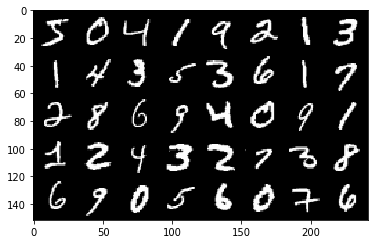

In [23]:
# make a grid of 40 images, 8 images per row
x_grid = utils.make_grid(x_train[:40], nrow=8, padding=2)
print(x_grid.shape)

# call helper function
show(x_grid)

## Data transformation

### 1. Let's define a transform class in order to apply some image transformation on MNIST dataset:

In [24]:
from torchvision import transforms

# loading MNIST training dataset
train_data = datasets.MNIST(path2data, train=True, download=True)

# define transformations
data_transform = transforms.Compose([
                    transforms.RandomHorizontalFlip(p=1),
                    transforms.RandomVerticalFlip(p=1),
                    transforms.ToTensor(),
])

### 2. Let's apply the transformations on an image from the MNIST dataset:

Text(0.5, 1.0, 'transformed')

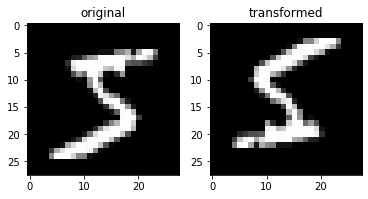

In [25]:
# get a sample image from training dataset
img = train_data[0][0]

# transform sample image
img_tr = data_transform(img)

# convert tensor to numpy array
img_tr_np = img_tr.numpy()

# show original and transformed images
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("original")
plt.subplot(1, 2, 2)
plt.imshow(img_tr_np[0], cmap="gray")
plt.title("transformed")

### 3. We can also pass the transformer function to the dataset class:

In [26]:
# define transformations
data_tranform = transforms.Compose([
                    transforms.RandomHorizontalFlip(1),
                    transforms.RandomVerticalFlip(1),
                    transforms.ToTensor(),
])

# Loading MNIST training data with on-the-fly transformations
train_data = datasets.MNIST(path2data, train=True, download=True, 
                            transform=data_transform)

## Wrapping tensors into a dataset

### 1. Let's create two data loaders for the training and validation datasets:

In [28]:
from torch.utils.data import TensorDataset

# wrap tensors into a dataset
train_ds = TensorDataset(x_train, y_train)
val_ds = TensorDataset(x_val, y_val)

for x,y in train_ds:
    print(x.shape, y.item())
    break

torch.Size([1, 28, 28]) 5


## Creating data loaders

### 1. Let's create two data loaders for the training and validation datasets:

In [29]:
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader(train_ds, batch_size=8)
val_dl = DataLoader(val_ds, batch_size=8)

# iterate over batches
for xb, yb in train_dl:
    print(xb.shape)
    print(yb.shape)
    break

torch.Size([8, 1, 28, 28])
torch.Size([8])
